In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\data_for_cdc\train(1)(train(1)).csv")
df_t=pd.read_csv(r"C:\Users\ASUS\Documents\data_for_cdc\test2(test(1)).csv")
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13907,7853301930,20141009T000000,405000,3,2.50,1960,6997,2.0,0,0,...,7,1960,0,2006,0,98065,47.5415,-121.887,2320,5178
559,5634500201,20150414T000000,470500,4,2.25,2070,14000,1.0,0,0,...,7,1720,350,1958,0,98028,47.7484,-122.237,1690,14444
4777,8068000305,20141104T000000,241000,3,1.00,1150,10000,1.0,0,0,...,6,1000,150,1951,0,98178,47.5075,-122.262,1340,10000
118,9407150100,20140625T000000,285000,3,2.00,1460,6377,1.0,0,0,...,7,1460,0,1995,0,98038,47.3679,-122.020,1600,6250
13311,6056111350,20150512T000000,439000,3,2.25,1430,2343,2.0,0,0,...,8,1430,0,2012,0,98108,47.5648,-122.294,1270,1916


In [197]:
df[df['bedrooms'] == 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,age,renovated,price_log
20,3918400017,380000,0,0.0,1470,979,3.0,0,2,3,8,0,2006,47.7145,-122.356,1470,1399,9,0,12.847927
1005,1453602309,288000,0,1.5,1430,1650,3.0,0,0,3,7,0,1999,47.7222,-122.290,1430,1650,16,0,12.570716
3882,2954400190,1295650,0,0.0,4810,28008,2.0,0,0,3,12,0,1990,47.6642,-122.069,4740,35061,24,0,14.074523
4663,3980300371,142000,0,0.0,290,20875,1.0,0,0,1,1,0,1963,47.5308,-121.888,1620,22850,52,0,11.863582
4670,2310060040,240000,0,2.5,1810,5669,2.0,0,0,3,7,0,2003,47.3493,-122.053,1810,5685,12,0,12.388394
8585,6896300380,228000,0,1.0,390,5900,1.0,0,0,2,4,0,1953,47.5260,-122.261,2170,6000,62,0,12.337101
10329,7849202299,320000,0,2.5,1490,7111,2.0,0,0,3,7,0,1999,47.5261,-121.826,1500,4675,16,0,12.676076
16199,9543000205,139950,0,0.0,844,4269,1.0,0,0,4,7,0,1913,47.2781,-122.250,1380,9600,102,0,11.849040


In [181]:
for col in df.columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

--- id ---
id
3935900232    2
4302201085    2
1524079093    2
643300040     2
526059224     2
             ..
6781200013    1
1778500620    1
1561900330    1
5104531640    1
9264901040    1
Name: count, Length: 16110, dtype: int64


--- date ---
date
20140623T000000    115
20140625T000000     99
20150325T000000     94
20150421T000000     93
20140626T000000     93
                  ... 
20141128T000000      1
20141227T000000      1
20141102T000000      1
20150515T000000      1
20141115T000000      1
Name: count, Length: 366, dtype: int64


--- price ---
price
450000    135
350000    134
425000    121
550000    113
325000    111
         ... 
283700      1
677900      1
710500      1
465500      1
366750      1
Name: count, Length: 3428, dtype: int64


--- bedrooms ---
bedrooms
3     7380
4     5128
2     2098
5     1213
6      197
1      142
7       26
8        9
0        8
9        5
10       2
33       1
Name: count, dtype: int64


--- bathrooms ---
bathrooms
2.50    4064
1.00    2891

In [182]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [307]:
df['date'] = pd.to_datetime(df['date'])
df_t['date'] = pd.to_datetime(df_t['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             16209 non-null  int64         
 1   date           16209 non-null  datetime64[ns]
 2   price          16209 non-null  int64         
 3   bedrooms       16209 non-null  int64         
 4   bathrooms      16209 non-null  float64       
 5   sqft_living    16209 non-null  int64         
 6   sqft_lot       16209 non-null  int64         
 7   floors         16209 non-null  float64       
 8   waterfront     16209 non-null  int64         
 9   view           16209 non-null  int64         
 10  condition      16209 non-null  int64         
 11  grade          16209 non-null  int64         
 12  sqft_above     16209 non-null  int64         
 13  sqft_basement  16209 non-null  int64         
 14  yr_built       16209 non-null  int64         
 15  yr_renovated   1620

In [308]:
temp_date = pd.to_datetime(df['date'])
temp_date_t = pd.to_datetime(df_t['date'])

sale_year = temp_date.dt.year + (temp_date.dt.month > 6).astype(int)
sale_year_t = temp_date_t.dt.year + (temp_date_t.dt.month > 6).astype(int)

df['age'] = sale_year - df['yr_built']
df_t['age'] = sale_year_t - df_t['yr_built']

df.drop('date', axis=1, inplace=True)
df_t.drop('date', axis=1, inplace=True)

In [309]:
print(df[['yr_built', 'age']].sample(5))

       yr_built  age
13066      1968   47
7250       1980   35
6266       1936   79
5692       1915  100
1009       1990   25


               sqft_living  sqft_above  sqft_lot  sqft_basement     price  \
sqft_living       1.000000    0.875830  0.172949       0.426891  0.700933   
sqft_above        0.875830    1.000000  0.183068      -0.062550  0.602648   
sqft_lot          0.172949    0.183068  1.000000       0.014630  0.088526   
sqft_basement     0.426891   -0.062550  0.014630       1.000000  0.320301   
price             0.700933    0.602648  0.088526       0.320301  1.000000   
yr_renovated      0.056486    0.023943  0.017512       0.071948  0.133075   

               yr_renovated  
sqft_living        0.056486  
sqft_above         0.023943  
sqft_lot           0.017512  
sqft_basement      0.071948  
price              0.133075  
yr_renovated       1.000000  


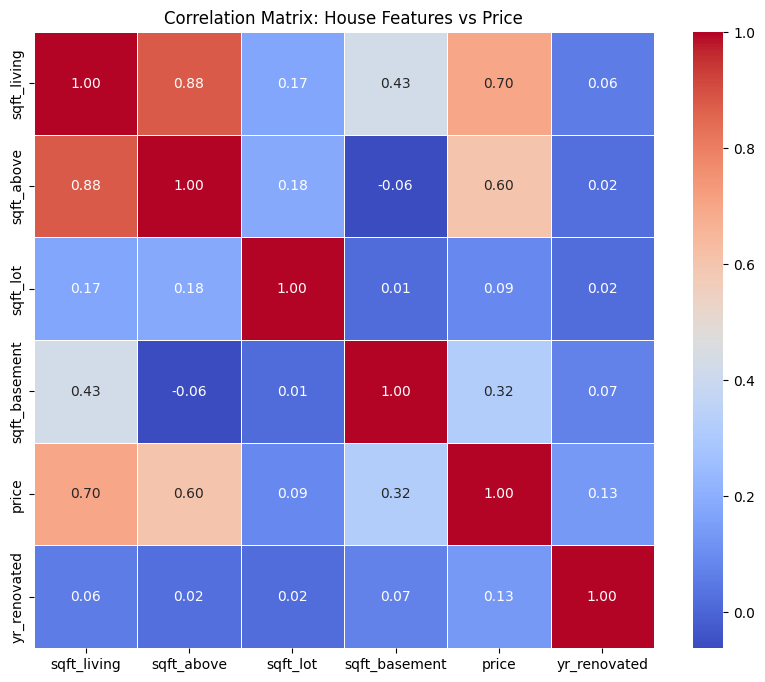

In [310]:
cols = ['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_basement', 'price', 'yr_renovated']
corr_matrix = df[cols].corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: House Features vs Price')
plt.show()

In [311]:
df.drop('sqft_above',axis=1,inplace=True)
df_t.drop('sqft_above',axis=1,inplace=True)

In [312]:
# 2. Calculate the age of the renovation
age_reno= sale_year - df['yr_renovated']
age_reno_t= sale_year_t - df_t['yr_renovated']

# 3. Create 'renovated' column based on your 25% threshold
# Logic: If age_reno <= 0.25 * age, then 1, else 0
df['renovated'] = (age_reno.values <= 0.50 * df['age'].values).astype(int)
df_t['renovated'] = (age_reno_t.values <= 0.50 * df_t['age'].values).astype(int)

df.drop('yr_renovated',axis=1,inplace=True)
df_t.drop('yr_renovated',axis=1,inplace=True)
df.sample(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated
6446,3990200125,385000,3,2.00,1860,7400,1.0,0,0,3,8,930,1922,98166,47.4598,-122.352,1640,8461,93,1
3519,1016000080,345000,3,1.00,1620,10610,1.0,0,0,4,6,0,1958,98059,47.4740,-122.125,1680,10795,57,0
12494,342000570,429000,2,1.00,1080,3600,1.0,0,0,3,7,0,1922,98122,47.6078,-122.291,2230,4500,93,0
15433,2768000390,577000,5,2.75,1940,5000,2.0,0,0,5,7,0,1951,98107,47.6704,-122.362,1940,4230,64,0
3083,806000020,203000,3,1.50,1200,9120,1.0,0,0,3,7,200,1963,98055,47.4545,-122.187,1640,9200,52,0


               sqft_living  sqft_lot  sqft_basement     price  renovated
sqft_living       1.000000  0.172949       0.426891  0.700933   0.062861
sqft_lot          0.172949  1.000000       0.014630  0.088526   0.012868
sqft_basement     0.426891  0.014630       1.000000  0.320301   0.076732
price             0.700933  0.088526       0.320301  1.000000   0.141477
renovated         0.062861  0.012868       0.076732  0.141477   1.000000


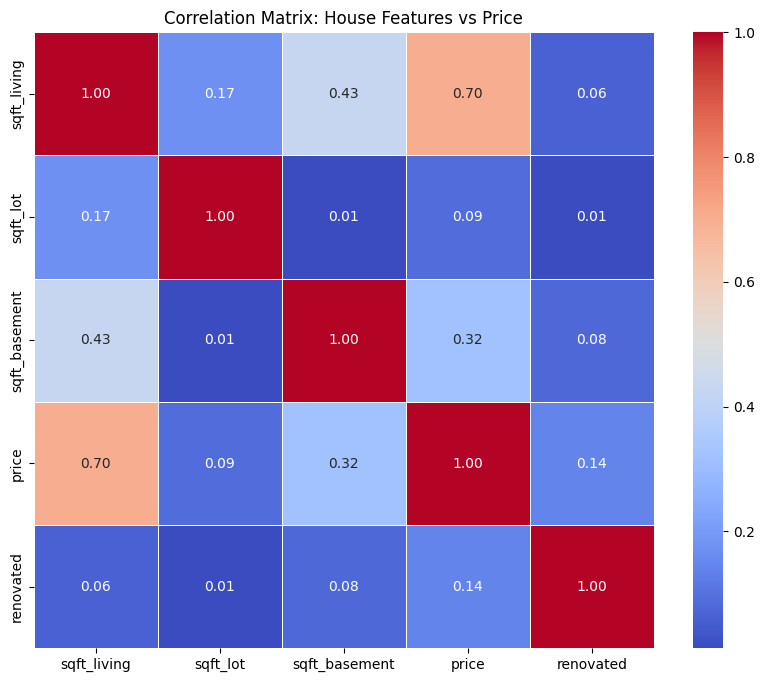

In [313]:
cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'price', 'renovated']
corr_matrix = df[cols].corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: House Features vs Price')
plt.show()

In [314]:
df.drop('zipcode',axis=1,inplace=True)
df_t.drop('zipcode',axis=1,inplace=True)

               price  waterfront      view     grade  condition
price       1.000000    0.245221  0.390534  0.664266   0.031333
waterfront  0.245221    1.000000  0.383340  0.060923   0.019247
view        0.390534    0.383340  1.000000  0.242506   0.048312
grade       0.664266    0.060923  0.242506  1.000000  -0.146829
condition   0.031333    0.019247  0.048312 -0.146829   1.000000


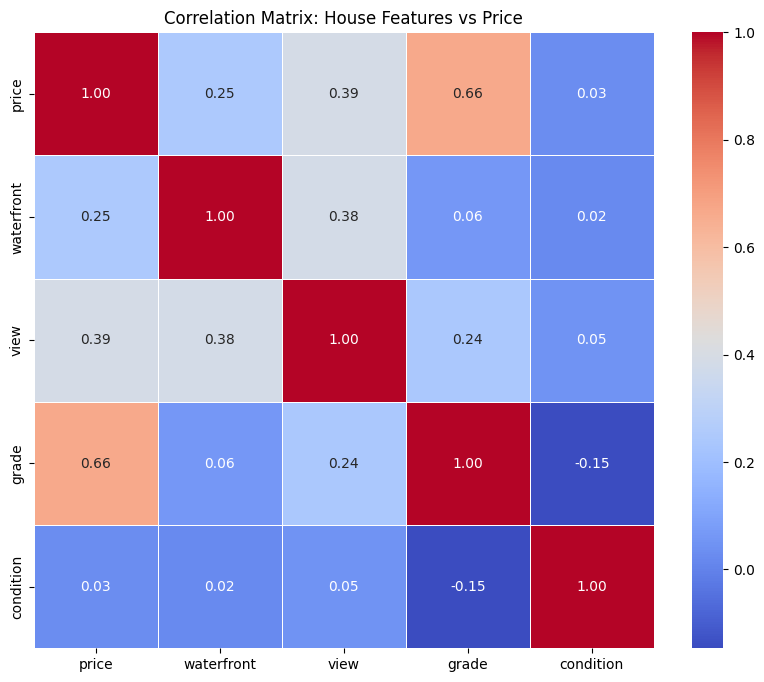

In [315]:

cols = ['price','waterfront','view', 'grade','condition']
corr_matrix = df[cols].corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: House Features vs Price')
plt.show()

**handdeling skew**

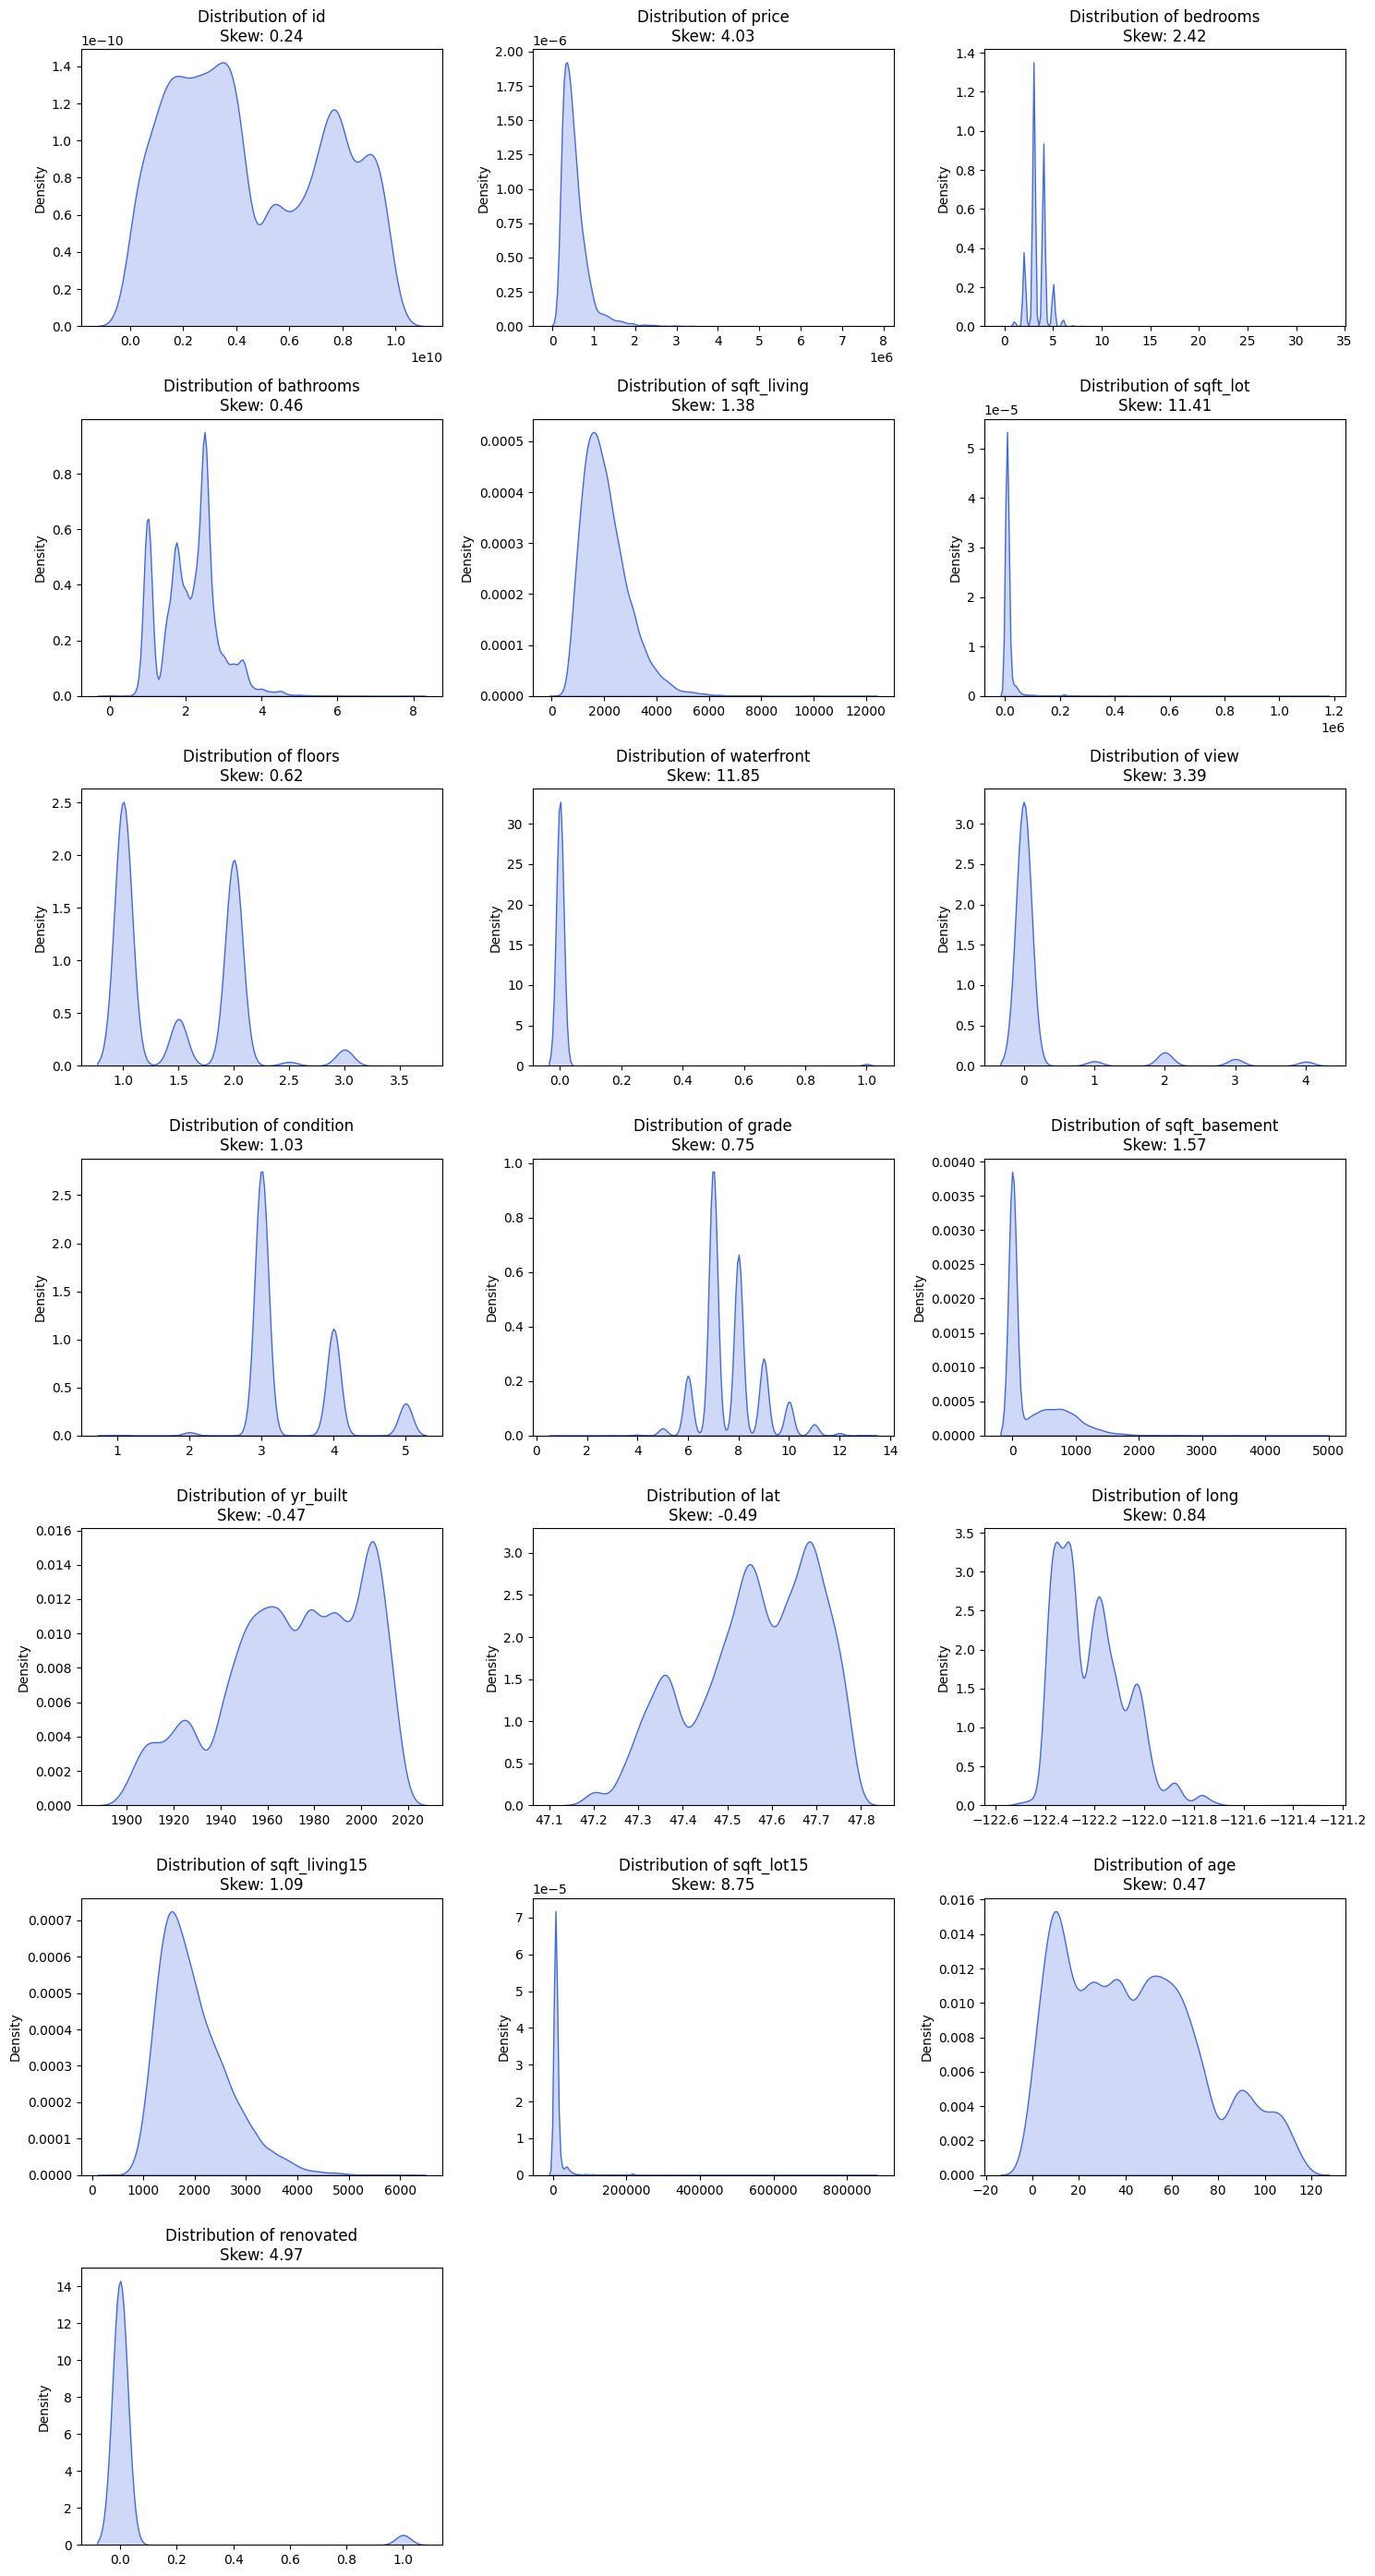

In [316]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Set up the figure grid
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + 1
plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df[col], fill=True, color='royalblue')
    plt.title(f'Distribution of {col}\nSkew: {df[col].skew():.2f}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

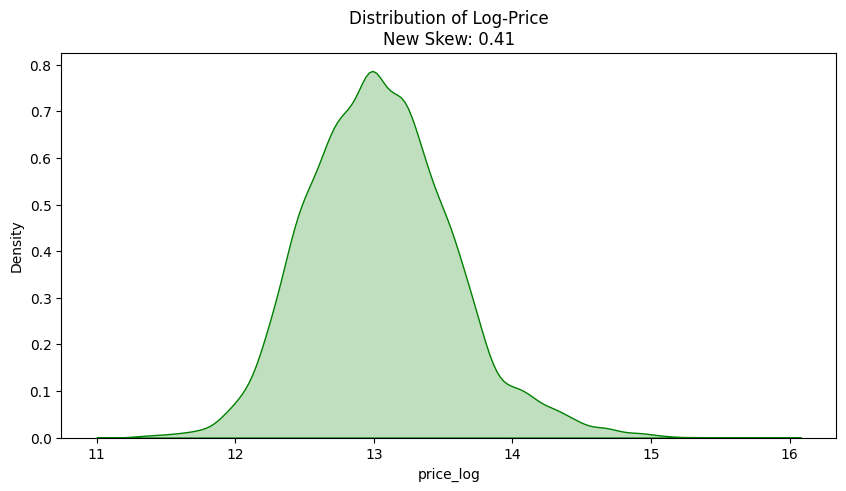

In [317]:
df['price_log'] = np.log(df['price'])

# 2. visual check
plt.figure(figsize=(10, 5))
sns.kdeplot(df['price_log'], fill=True, color='green')
plt.title(f"Distribution of Log-Price\nNew Skew: {df['price_log'].skew():.2f}")
plt.show()

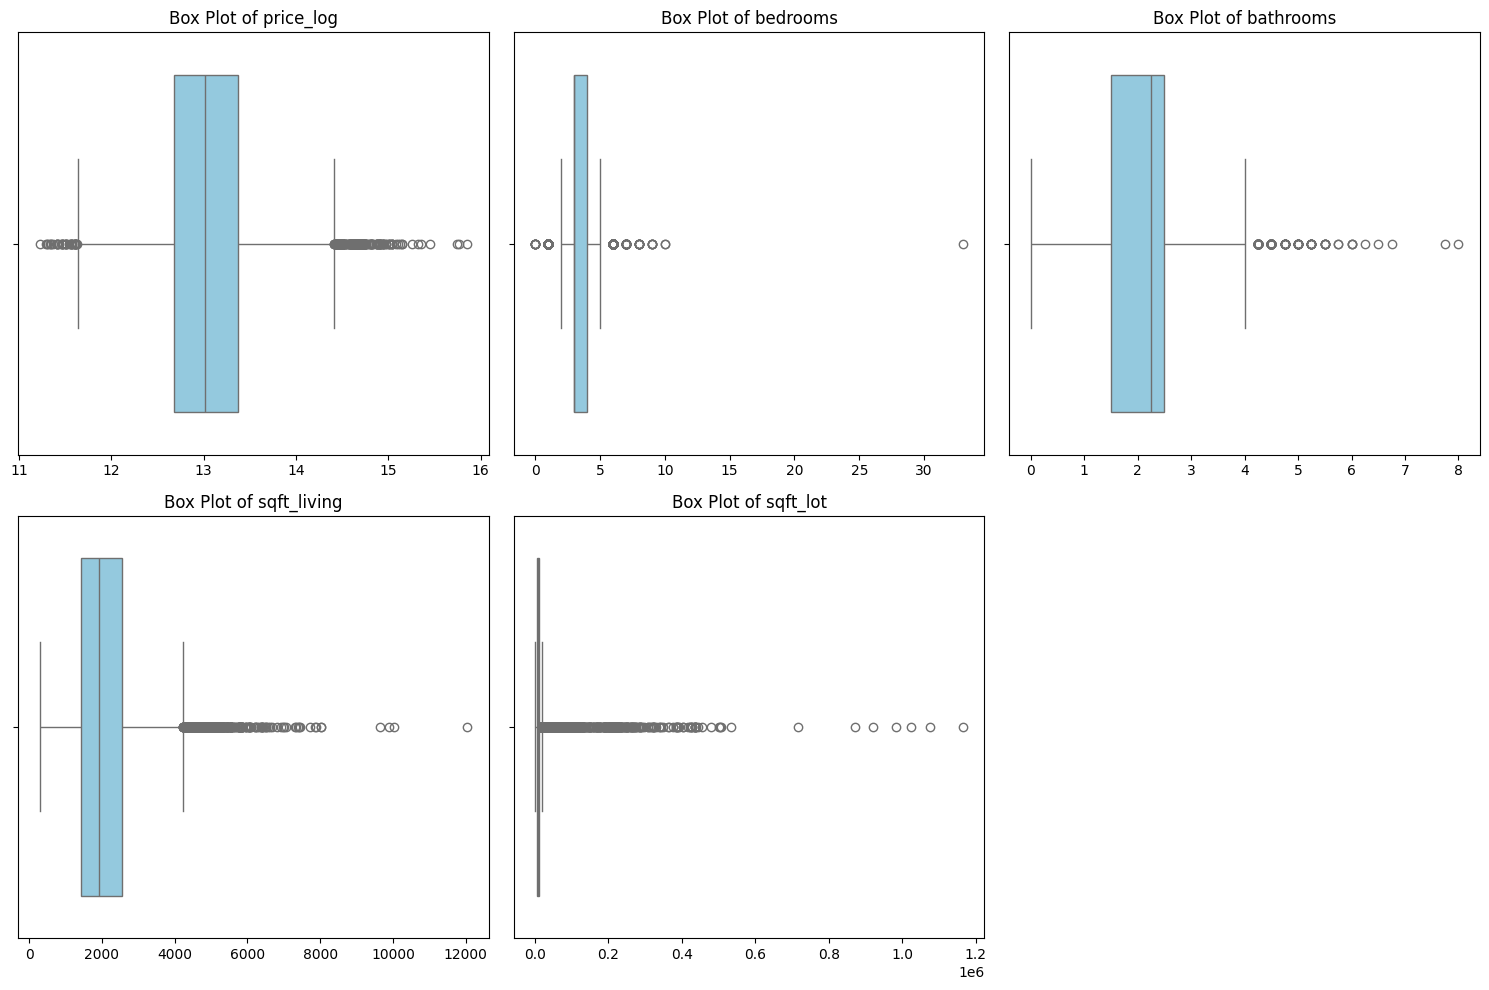

In [318]:
features = ['price_log', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Set up the figure size (width, height)
plt.figure(figsize=(15, 10))

# Loop through the features and create a subplot for each
for i, col in enumerate(features):
    # Create a grid: 2 rows, 3 columns
    plt.subplot(2, 3, i + 1)
    
    # Create the box plot
    sns.boxplot(x=df[col], color='skyblue')
    
    # Add titles for clarity
    plt.title(f'Box Plot of {col}')
    plt.xlabel('') # Remove x-label to keep it clean

plt.tight_layout()
plt.show()

In [319]:
df['bedrooms'] = df['bedrooms'].clip(upper=10)
df['bathrooms'] = df['bathrooms'].clip(upper=6)

In [320]:
df_t['bedrooms'] = df_t['bedrooms'].clip(upper=10)
df_t['bathrooms'] = df_t['bathrooms'].clip(upper=6)

In [321]:
df['sqft_living_log'] = np.log1p(df['sqft_living'])

In [322]:
df_t['sqft_living_log'] = np.log1p(df_t['sqft_living'])
# df_t['sqft_lot15_log'] = np.log1p(df_t['sqft_lot15'])
# df_t['sqft_lot_log'] = np.log1p(df_t['sqft_lot'])

In [323]:
df['sqft_lot15_log'] = np.log1p(df['sqft_lot15'])

In [324]:
df['sqft_lot_log'] = np.log1p(df['sqft_lot'])

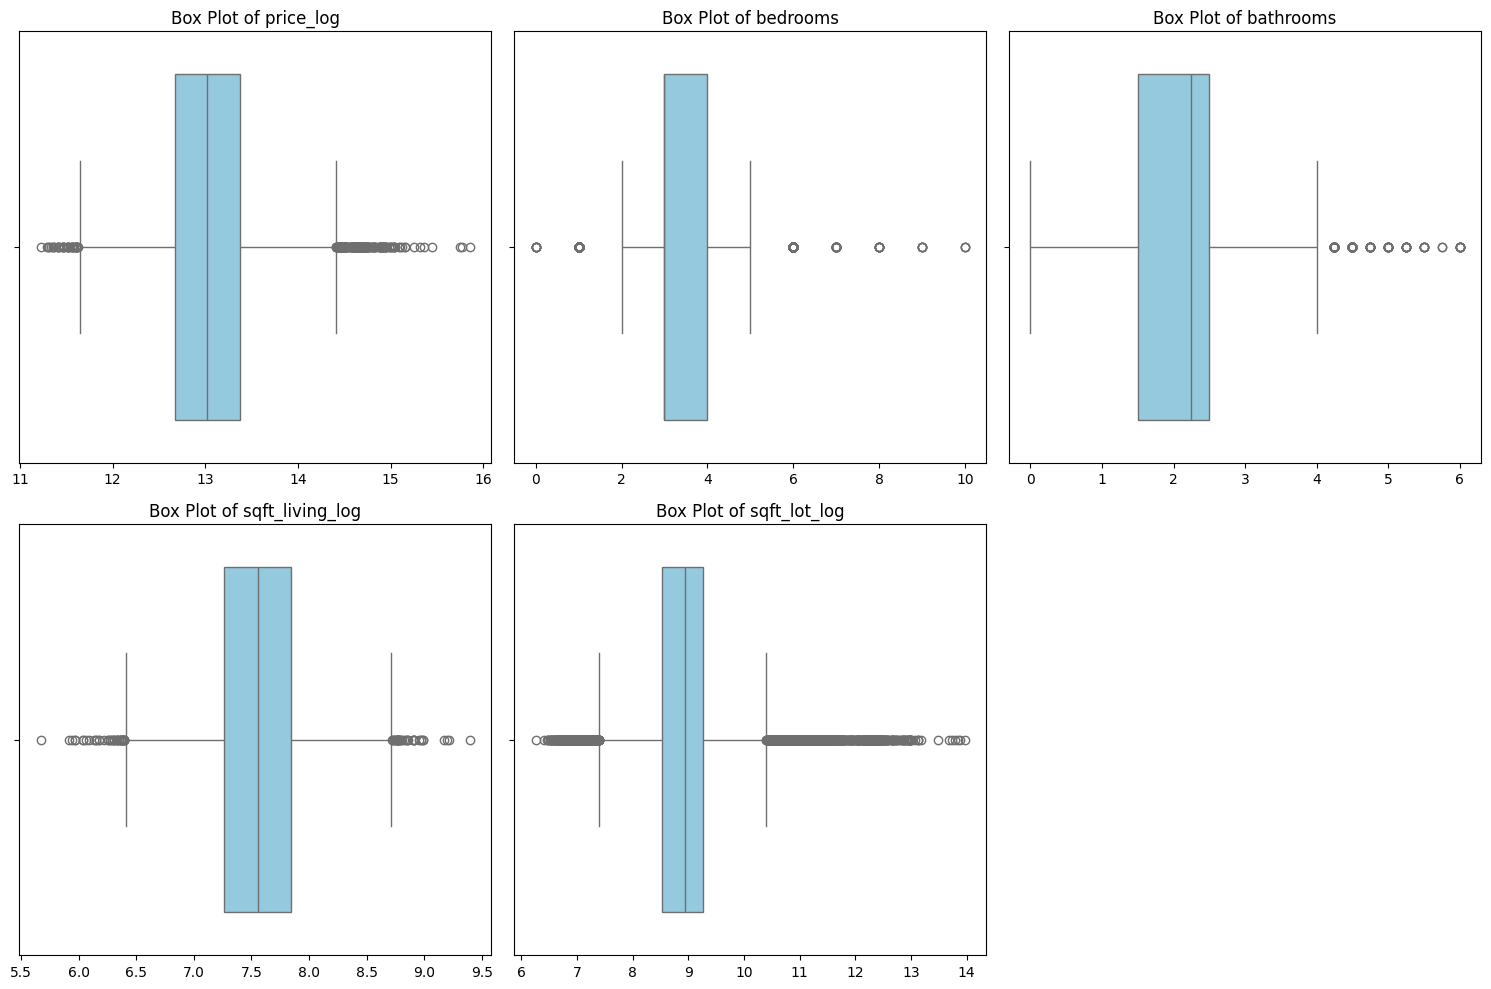

In [325]:
features = ['price_log', 'bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot_log']

# Set up the figure size (width, height)
plt.figure(figsize=(15, 10))

# Loop through the features and create a subplot for each
for i, col in enumerate(features):
    # Create a grid: 2 rows, 3 columns
    plt.subplot(2, 3, i + 1)
    
    # Create the box plot
    sns.boxplot(x=df[col], color='skyblue')
    
    # Add titles for clarity
    plt.title(f'Box Plot of {col}')
    plt.xlabel('') # Remove x-label to keep it clean

plt.tight_layout()
plt.show()

In [333]:
X_train.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,age,renovated,sqft_living_log
4140,3,1.00,-0.142283,1.0,0,0,3,6,-0.793157,1958,47.5297,-121.827,-1.714349,57,0,7.107425
1510,2,2.00,-0.842147,1.5,0,0,3,7,1.247364,1922,47.5596,-122.315,-0.352533,93,1,7.606387
6706,4,2.50,0.081389,2.0,0,0,3,9,-0.793157,1998,47.6378,-122.065,1.164527,17,0,7.852050
11009,4,2.25,0.474658,1.0,0,2,5,10,1.290708,1953,47.7117,-122.278,1.194933,62,0,7.916078
6554,4,5.25,3.138038,2.0,0,2,3,10,-0.793157,2006,47.5605,-121.905,0.115431,9,0,8.564268


In [327]:
df.drop(['sqft_living','sqft_lot_log','sqft_lot15_log'],axis=1,inplace=True)
df_t.drop(['sqft_living'],axis=1,inplace=True)

In [328]:
df.drop(['sqft_lot15'],axis=1,inplace=True)
df_t.drop(['sqft_lot15'],axis=1,inplace=True)

In [329]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price','price_log','id'], axis=1)
y = df['price_log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [330]:
from sklearn.preprocessing import PowerTransformer
# removed lot15 from here
cols = ['sqft_lot', 'sqft_living15']

pt = PowerTransformer(method='yeo-johnson')

X_train[cols] = pt.fit_transform(X_train[cols])
X_test[cols]  = pt.transform(X_test[cols])
df_t[cols]    = pt.transform(df_t[cols])

In [331]:
cols = ['sqft_basement']
pt = PowerTransformer(method='yeo-johnson')
X_train[cols] = pt.fit_transform(X_train[cols])
X_test[cols]  = pt.transform(X_test[cols])
df_t[cols]    = pt.transform(df_t[cols])

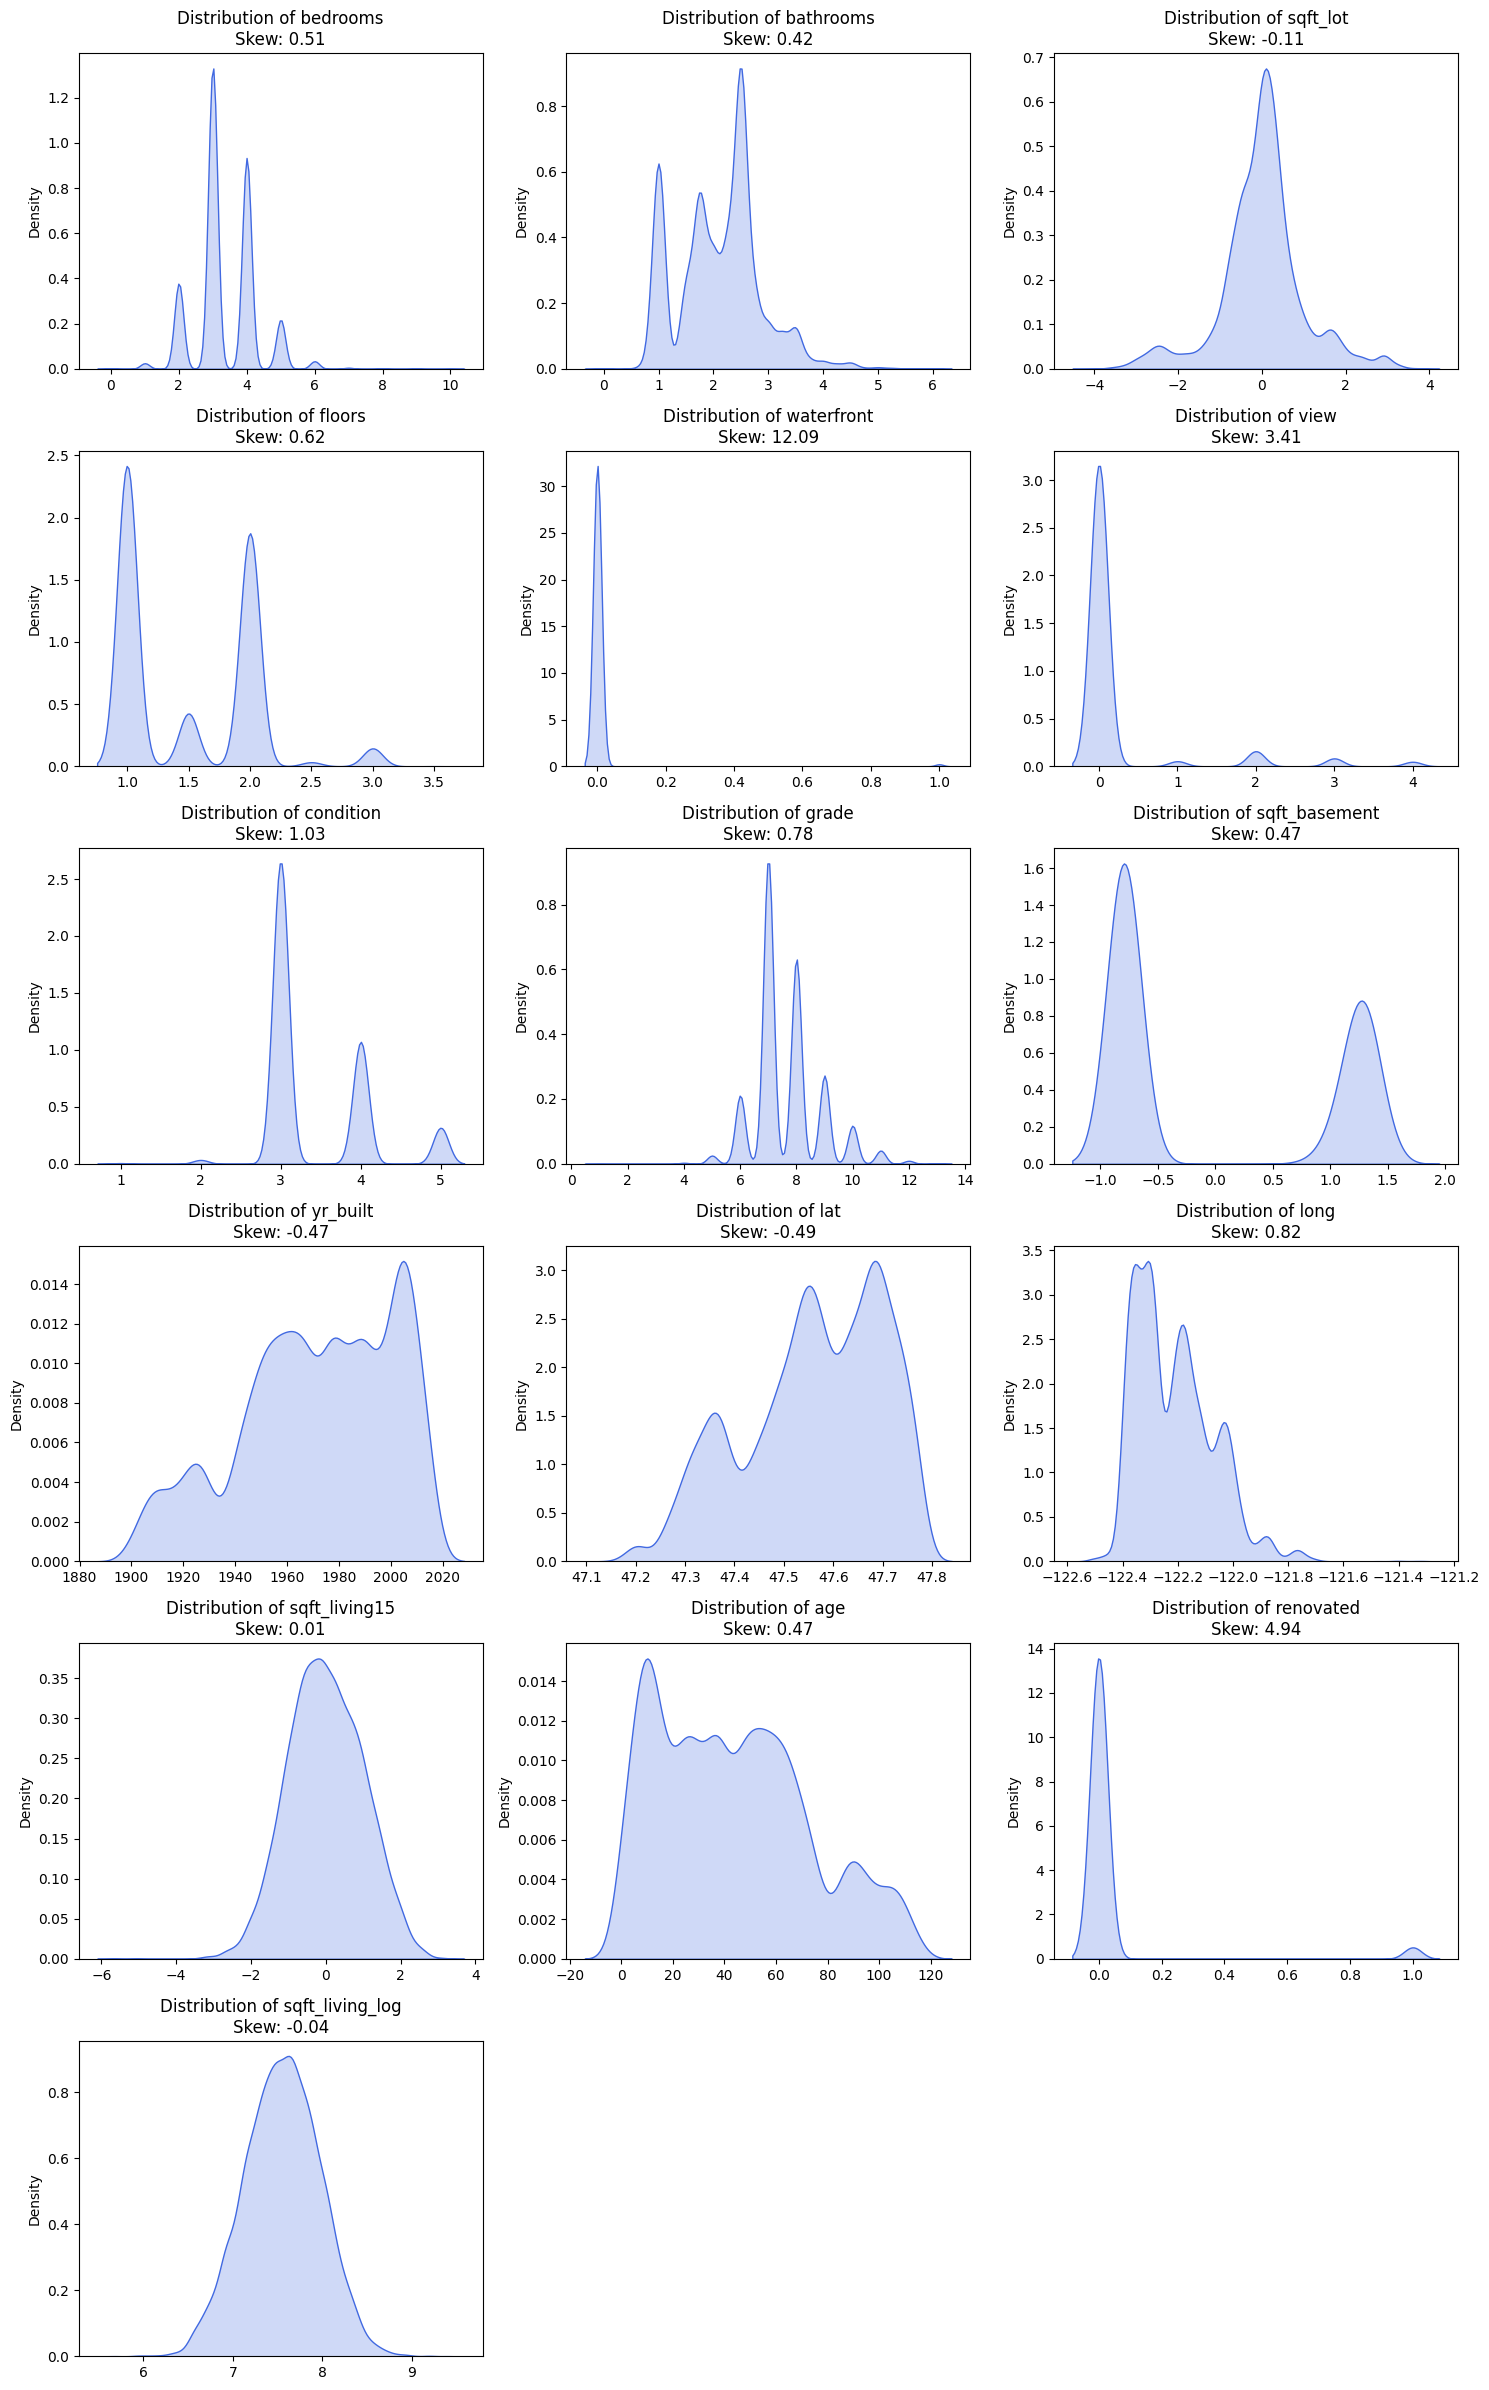

In [292]:
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Set up the figure grid
n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + 1
plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(X_train[col], fill=True, color='royalblue')
    plt.title(f'Distribution of {col}\nSkew: {X_train[col].skew():.2f}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [335]:
df.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,age,renovated,price_log,sqft_living_log
0,9117000170,268643,4,2.25,9240,2.0,0,0,3,7,0,1961,47.4362,-122.187,1660,54,0,12.501139,7.501634
1,6700390210,245000,3,2.50,2788,2.0,0,0,4,7,0,1992,47.4034,-122.187,1720,23,0,12.409013,7.378384
2,7212660540,200000,4,2.50,8638,2.0,0,0,3,8,0,1994,47.2704,-122.313,1870,21,0,12.206073,7.450661
3,8562780200,352499,2,2.25,705,2.0,0,0,3,7,90,2009,47.5321,-122.073,1240,6,0,12.772803,7.123673
4,7760400350,232000,3,2.00,13356,1.0,0,0,3,7,0,1994,47.3715,-122.074,1590,21,0,12.354493,7.155396


In [293]:
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit on Training Data ONLY and Transform it
# This learns the mean and variance of the training set
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform Test and Submission data using the SAME scaler
# Do NOT fit again. Use the stats learned from train.
X_test_scaled = scaler.transform(X_test)
# X_submit_scaled = scaler.transform(df_t)

# 4. Save everything (Data + The Scaler itself)
# It is important to save the 'scaler' object so you can un-scale predictions 
# or scale new input data in the future.
joblib.dump({
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test,
    'X_submit': df_t,
    'scaler': scaler  # <--- Essential to save this!
}, 'ml_data.pkl')

print("Data scaled and saved successfully.")

Data scaled and saved successfully.


In [297]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3242 entries, 4226 to 714
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         3242 non-null   int64  
 1   bathrooms        3242 non-null   float64
 2   sqft_lot         3242 non-null   float64
 3   floors           3242 non-null   float64
 4   waterfront       3242 non-null   int64  
 5   view             3242 non-null   int64  
 6   condition        3242 non-null   int64  
 7   grade            3242 non-null   int64  
 8   sqft_basement    3242 non-null   float64
 9   yr_built         3242 non-null   int64  
 10  lat              3242 non-null   float64
 11  long             3242 non-null   float64
 12  sqft_living15    3242 non-null   float64
 13  age              3242 non-null   int64  
 14  renovated        3242 non-null   int64  
 15  sqft_living_log  3242 non-null   float64
dtypes: float64(8), int64(8)
memory usage: 430.6 KB


In [300]:
import os
import pandas as pd
import joblib
import numpy as np

# =========================
# LOAD SAVED OBJECTS
# =========================
data = joblib.load('ml_data.pkl')

X_train_scaled = data['X_train']
X_test_scaled  = data['X_test']
y_train = data['y_train']
y_test  = data['y_test']
X_submit = data['X_submit']   # DataFrame
scaler = data['scaler']

# =========================
# FEATURE NAMES (FROM YOUR PIPELINE)
# =========================
feature_cols = X.columns.tolist()

# =========================
# CONVERT TO DATAFRAMES
# =========================
X_train_df = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_df  = pd.DataFrame(X_test_scaled,  columns=feature_cols)

# =========================
# INVERSE SCALE lat & long ONLY
# =========================
lat_lon_cols = ['lat', 'long']

for col in lat_lon_cols:
    idx = feature_cols.index(col)
    mean = scaler.mean_[idx]
    scale = scaler.scale_[idx]

    X_train_df[col] = X_train_df[col] * scale + mean
    X_test_df[col]  = X_test_df[col]  * scale + mean

# =========================
# OUTPUT DIRECTORY
# =========================
out_dir = r"C:\Users\ASUS\Documents\new new"
os.makedirs(out_dir, exist_ok=True)

# =========================
# CREATE train.csv
# =========================
X_all = pd.concat([X_train_df, X_test_df], ignore_index=True)
y_all = pd.concat(
    [y_train.reset_index(drop=True), y_test.reset_index(drop=True)],
    ignore_index=True
)

train_df = X_all.copy()
train_df['price_log'] = y_all

train_df.to_csv(os.path.join(out_dir, "train.csv"), index=False)

# =========================
# CREATE test.csv
# =========================
test_df = X_submit.copy()   # already unscaled
test_df.to_csv(os.path.join(out_dir, "test.csv"), index=False)

print("✅ lat & long unscaled, files saved successfully")


✅ lat & long unscaled, files saved successfully


['ml_data.pkl']